In [661]:
import minisom
import pandas as pd
import sklearn
import matplotlib
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot
import matplotlib.pyplot as plt

In [662]:
base = pd.read_csv('entradas_breast.csv')
base

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,25.74,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000


In [663]:
base.shape

(569, 30)

In [664]:
base.columns

Index([' radius_mean', ' texture_mean', ' perimeter_mean', ' area_mean',
       ' smoothness_mean', ' compactness_mean', ' concavity_mean',
       'concave_points_mean', ' symmetry_mean', ' fractal_dimension_mean',
       ' radius_se', ' texture_se', ' perimeter_se', ' area_se',
       ' smoothness_se', ' compactness_se', ' concavity_se',
       ' concave_points_se', ' symmetry_se', ' fractal_dimension_se',
       ' radius_worst', ' texture_worst', ' perimeter_worst', ' area_worst',
       ' smoothness_worst', ' compactness_worst', ' concavity_worst',
       ' concave_points_worst', ' symmetry_worst', ' fractal_dimension_worst'],
      dtype='object')

In [665]:
saida = pd.read_csv('saidas_breast.csv')
saida

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [666]:
saida.columns

Index(['0'], dtype='object')

In [667]:
X = base.values
y = saida.values.ravel()

In [668]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

In [669]:
print(X.shape)
print(y.shape)
print(y[:10])

(569, 30)
(569,)
[0 0 0 0 0 0 0 0 0 0]


In [670]:
som = MiniSom(x=11, y=11, input_len=30, sigma=3.0, learning_rate=0.5, random_seed=0)

In [671]:
som.random_weights_init(X)

In [672]:
som.train_random(data = X, num_iteration=1000)

In [673]:
som._weights.shape

(11, 11, 30)

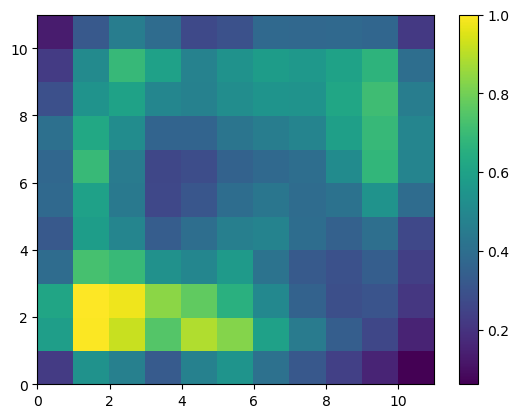

In [674]:
pcolor(som.distance_map().T)
colorbar()

In [675]:
#definir marcadores e cores para plotar os grupos
markers = ['o', 's']
colors = ['r', 'g']  # 'r' para maligno, 'g' para benigno

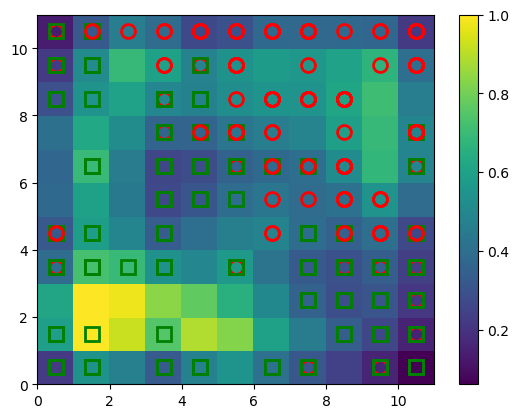

In [676]:
pcolor(som.distance_map().T)
colorbar()

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor='None',
         markeredgecolor=colors[y[i]], markeredgewidth=2, markersize=10)